In [1]:
from circuitClass import *

## Intorduction
In this document, I am trying to use the Qcircuit to recalculate the eigen-energies of the Hamiltonain for the following circuits based on the paper <em>A quantum engineer's guide to superconducting qubits</em>.<br/>
1. Symmetric transmon
2. Asymmetric Transmon 

## Symmetric transmon
<table><tr>
    <td><img src="pic/pic3a.png" style="height:200px"/><td/>
    <td><img src="pic/pic3b.png" style="height:200px"/><td/>
<tr><table/>

The parameter that papar used are $E_c/h = 0.3$GHz and $E_j/h=7.5$GHz(In the paper they said that $E_j/h=15$GHz which we think they are just wrong by a factor of half). using $E_c = e^2/(2C_x)$, we extract the parameter for the Qcircuit


In [2]:
Ec = hbar*0.3*GHz
Ej = hbar*15*GHz/2
Cx = e**2/2/Ec

In this part, we use Qcircuit to solve the above Hamiltonain.First step, we have to initialize the circuit parameters and its topology.

In [3]:
graph = [[0,1]]
L = [0]
C = [Cx]
JJ = [[Ej/hbar , Ej/hbar]]

# define the circuit
cr1 = Qcircuit(graph,L,C,JJ)

Now we set the excitation for the circuit

In [4]:
# we apply excitation to the loop created at the edge [0,1] with parallel junctions
phiExt = np.linspace(0,2,300)*2*np.pi
cr1.setExcitation([([0,1],phiExt)])

configure() attribute of class creates and organizes the circuit equations

In [5]:
cr1.configure()

solveCircuit() attribute of class calculate the Hamiltonain of the circuit for external fluxes that we set in setExcitation. Eigenfrequencies of the net Hamiltonian is stored in the HamilEig variable of the class.

In [6]:
cr1.solveCircuit(showLoading=False)

Text(0, 0.5, 'GHz')

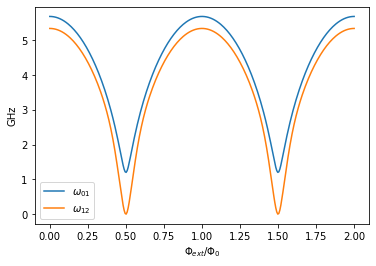

In [7]:
plt.figure()
plt.plot(phiExt/2/np.pi,(cr1.HamilEig[1,:]-cr1.HamilEig[0,:]).real/GHz)
plt.plot(phiExt/2/np.pi,(cr1.HamilEig[2,:]-cr1.HamilEig[1,:]).real/GHz)
plt.legend(['$\omega_{01}$','$\omega_{12}$'])
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("GHz")


In this part I just double check my result by finding the eigenenergies of the following Hamiltonain.
\begin{equation}
H = 4E_cn^2 - 2*E_j|cos\phi_e|(d + d^\dagger),
\end{equation}
in which d is charge displacement operator

In [8]:
d = cr1.chargeDisp(cr1.m[0])
cosPhi = (d + d.dag())/2

In [9]:
HamilEig = np.zeros((cr1.m[0],len(phiExt)),dtype='complex');
for i in range(len(phiExt)):
    HLC = (1/2*(2*e)**2/Cx)/hbar*q.charge((cr1.m-1)/2)*q.charge((cr1.m-1)/2)
    HJJ = -2*Ej/hbar*abs(np.cos(phiExt[i]/2))*cosPhi
    H = HLC + HJJ
    
    eigenValues , eigenVectors = H.eigenstates();
    HamilEig[:,i] = eigenValues
    

Text(0, 0.5, 'GHz')

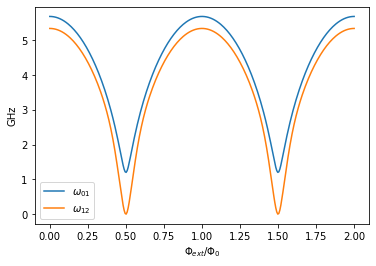

In [10]:
plt.plot(phiExt/2/np.pi,(HamilEig[1,:]-HamilEig[0,:]).real/GHz)
plt.plot(phiExt/2/np.pi,(HamilEig[2,:]-HamilEig[1,:]).real/GHz)
plt.legend(['$\omega_{01}$','$\omega_{12}$'])
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("GHz")

Now we use the approximation formula to check the qubit energy for large $\omega$. 

\begin{align}
\omega_{01} = \sqrt{8E_j^{\prime}E_c}-Ec\\
\omega_{12} = \omega_{01} - E_c
\end{align}


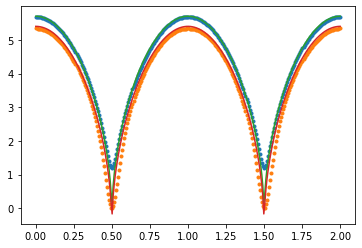

In [11]:
EjPrime = 2*Ej*np.abs(np.cos(phiExt/2))
omega01 = (np.sqrt(8*EjPrime*Ec)-Ec)/hbar/GHz
omega12 = omega01 -Ec/hbar/GHz
plt.plot(phiExt/2/np.pi,(HamilEig[1,:].real-HamilEig[0,:].real)/GHz,'.')
plt.plot(phiExt/2/np.pi,(HamilEig[2,:].real-HamilEig[1,:].real)/GHz,'.')
plt.plot(phiExt/2/np.pi,omega01)
plt.plot(phiExt/2/np.pi,omega12)

## Asymmetric Transmon
<table><tr>
    <td><img src="pic/pic6a.png" style="height:200px"/><td/>
    <td><img src="pic/pic6b.png" style="height:200px"/><td/>
<tr><table/>

In [12]:
gamma = 2.5*2
EjSigma = 15*GHz*hbar
Ej1 = EjSigma/(1+gamma);
Ej2 = gamma*Ej1

In [13]:
graph = [[0,1]]
L = [0]
C = [Cx]
JJ = [[Ej1/hbar , Ej2/hbar]]

# define the circuit
cr2 = Qcircuit(graph,L,C,JJ)

# we apply excitation to the loop created at the edge [0,1] with parallel junctions
phiExt = np.linspace(0,2,300)*2*np.pi
cr2.setExcitation([([0,1],phiExt)])

cr2.configure()
cr2.solveCircuit(showLoading=False)

(0, 6)

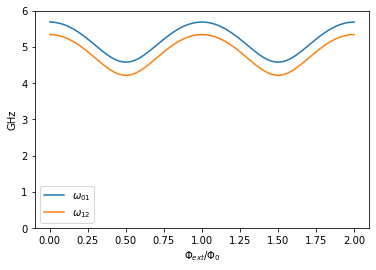

In [14]:
plt.figure()
plt.plot(phiExt/2/np.pi,(cr2.HamilEig[1,:].real-cr2.HamilEig[0,:].real)/GHz)
plt.plot(phiExt/2/np.pi,(cr2.HamilEig[2,:].real-cr2.HamilEig[1,:].real)/GHz)
plt.legend(['$\omega_{01}$','$\omega_{12}$'])
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("GHz")
plt.ylim([0,6])
